**Contents**

1. [Open files](#open_files)


2. [Data preprocessing](#preprocessing)

      2.1 [Missing values](#missing_values)
      
      2.2 [Outliers analysis](#outliers) 
      
      2.3 [Variable types](#types) 
      
      2.4 [Duplicates processing](#duplicates) 
      
      2.5 [Data categorization](#categorization)
      
      
3. [EDA](#eda)

      3.1 [Relationship between the number of children and loan repayment on time](#children_and_debt)
      
      3.2 [Relationship between marital status and loan repayment on time](#marriage_and_debt)
      
      3.3 [Relationship between income level and loan repayment on time](#income_and_debt)
      
      3.4 [Relationship between purposes of a loan and loan repayment on time](#purpose_and_debt)
      
      
4. [General conclusion](#conclusion)

# Study of the bank borrower reliability

**Input data** from the bank - statistics on the solvency of customers. The customer is the credit department of the bank. It is necessary to find out whether the marital status and the number of children of the client affect the fact of repaying the loan on time. The results of the study will be taken into account when building a credit scoring model - a special system that assesses the ability of a potential borrower to return a loan to a bank.

**Purpose**: Using data from the Yandex.Realty service, determine the market value of real estate and typical parameters of apartments.

**Datasets structure**:

- `children` — number of children in the family
- `days_employed` — total work experience in days
- `dob_years` — client's age in years
- `education` — the level of education of the client
- `education_id` — education level identifier
- `family_status` — marital status
- `family_status_id` — marital status identifier
- `gender` — gender of the client
- `income_type` — type of employment
- `debt` — whether he had debt to repay loans
- `total_income` — monthly income
- `purpose` — the purpose of obtaining a loan

In [ ]:
# Loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="open_files"></a> 

## 1. Open files

In [1]:
# Reading file
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
# First 20 rows of dataset
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Let's create a separate `na_data` dataset with rows that have missing values for further study.

In [4]:
na_data = data.loc[(data['days_employed'].isna()) | (data['total_income'].isna())]
na_data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [5]:
# Dataframe length
len(na_data)

2174

<a id="preprocessing"></a> 

## 2. Data preprocessing

<a id="missing_values"></a> 

###      2.1 Missing values

In [6]:
# Count the number of missing values for each column
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The amount of income is most affected by the type of employment, so fill in the gaps in this column with the median value for each type from the `income_type` column. For example, for a person with an employment type of `сотрудник` (employee), the gap in the `total_income` column should be filled with the median income among all records with the same type.

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Missing values occur only in both `total_income` and `days_employed` variables at once, since the length of the `na_data` dataframe is equal to the number of gaps in the original dataset.

Possible reasons for missing values:

- The client has never been officially employed (freelance, individual entrepreneur, private investor-trader). Then the confirmation of unofficial income and length of service does not come from the employer, but in the form of a bank;

- The client receives a salary or pension on the card of this bank, and he does not need to confirm income and length of service;

- The client is a bank employee, and he does not need to confirm income and length of service;

- The client has not taken a loan for a long time (more than 7 years), and the period of storage of his data has come to an end;

- Data upload failed.


Importantly, that the average value incorrectly characterizes the data when some values stand out strongly among the majority.
At the same time, it is known that, for example, such a quantitative variable as earnings is distributed abnormally. Let's demonstrate this on the original data.

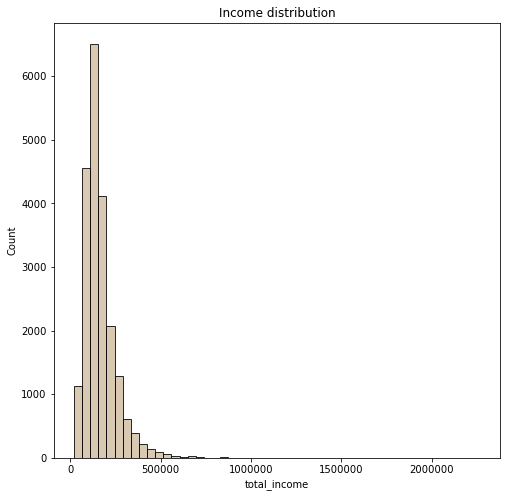

In [44]:
# Income distribution
plt.ticklabel_format(style='plain')
    
sns.histplot(data=data, 
             x='total_income', 
             color='#cdb89a', 
             bins=50).set(title='Income distribution');

The graph shows that the distribution of income is skewed to the right - most bank customers earn less than 500,000 rubles per month. In reality, wage data is unevenly distributed.

Now let's look at the median and mean for the `total_income` variable.

In [45]:
data['total_income'].median()

142594.0

In [46]:
data['total_income'].mean()

165342.74576906848

The mean and median differ from each other by almost 23,000 rubles, since the mean is very sensitive to "unusual" values, outliers. For example, trere are only 25 clients earning more than 1,000,000 rubles per month, although these data will strongly "pull over" the average salary for the sample.

*****

Let's look at the distribution of the `days_employed` variable in the data.

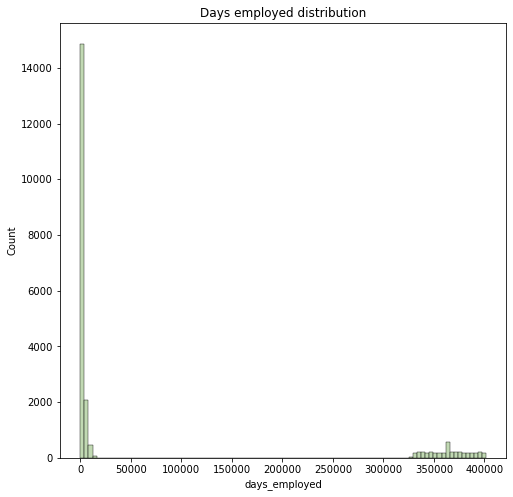

In [47]:
# Days employed distribution
plt.ticklabel_format(style='plain')
    
sns.histplot(data=data, 
             x='days_employed', 
             color='#accd9a', 
             bins=100).set(title='Days employed distribution');

The graph clearly shows a peak near the minimum values and a "stripe" of extremely high values due to abnormally high values among pensioners and the unemployed (as we found out in Task 7).


Let's also calculate the median and mean for the `days_employed` variable.

In [48]:
data['days_employed'].median()

1996.732855437927

In [49]:
data['days_employed'].mean()

67148.9721325843

The average work experience is strongly skewed to the right and is 33 times the median for the sample, so it is better to fill in the gaps with the median, as it corresponds to the "expected" value.

<a id="outliers"></a> 

### 2.2 Outliers analysis 

Outliers (anomalies) can occur in the data - values that do not reflect reality and appeared due to some kind of error. Such an artifact would be the negative number of days of work experience in the `days_employed` column. For real data, this is normal. Let's process the values in this column: replace all negative values with positive ones.

In [8]:
data['days_employed'] = data['days_employed'].abs()

For each type of employment, let's display the median value of the work experience `days_employed` in days.

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (`безработный` - unemployed and `пенсионер` - pensioners) have abnormally large values. Correcting such values is difficult, so let's leave them as they are. Moreover, we will not need this column for research.

In [10]:
# Unique chaildren column values
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

There are two anomalous values in the `children` column. Let's remove the rows that contain such anomalous values from the dataframe data.

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [12]:
# Unique chaildren column values again 
# to make sure the artifacts have been removed
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Let's fill in the gaps in the `days_employed` column with the median values for each `income_type` of employment.

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [14]:
# Make sure all gaps are filled
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<a id="types"></a> 

### 2.3 Variable types

Let's replace the float data type in the `total_income` column with an integer one.

In [15]:
data['total_income'] = data['total_income'].astype(int)

Several variables have **wrong data type**. Let's transform them:

* `children ` convert from int to str (in order to use this variable for grouping later);

* `education_id` is converted from int to str (since numbers are categories here);

* `family_status_id` is converted from int to str (numbers act as categories);

* `debt` is converted from int to str (numbers act as categories).

In [25]:
data['children'] = data['children'].astype(str)
data['education_id'] = data['education_id'].astype(str)
data['family_status_id'] = data['family_status_id'].astype(str)
data['debt'] = data['debt'].astype(str)

<a id="duplicates"></a>

### 2.4 Duplicates processing 

Let's handle the implicit duplicates in the `education` column. This column has the same values, but written differently: using uppercase and lowercase letters. Let's convert them to lower case. Then also let's check the rest of the columns.

In [16]:
data['education'] = data['education'].str.lower()

In [17]:
# Number of duplicate rows in the data
data.duplicated().sum()

71

In [18]:
# Removing duplicate rows
data = data.drop_duplicates()

<a id="categorization"></a> 

### 2.5 Data categorization

Based on the ranges below, create a `total_income_category` column with categories in the `data` dataframe:**

- 0–30000 - `'E'`;

- 30001–50000 - `'D'`;

- 50001–200000 - `'C'`;

- 200001–1000000 - `'B'`;

- 1000001 and above - `'A'`.


For example, a borrower with an income of 25,000 should be assigned an `'E'` category, and a customer with an income of 235,000 would be assigned a `'B'` category.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Let's display a list of unique purposes for taking a loan from the `purpose` column.

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Let's create a function that, based on the data from the `purpose` column, will form a new `purpose_category` column, which will include the following categories:

- `'car operations'`,
- `'real estate transactions'`,
- `'conducting a wedding'`,
- `'getting an education'`.

For example, if the `purpose` column contains the substring `'car purchase'`, then the `purpose_category` column should contain the string `'car operations'`.

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Let's also create "reference books" to quickly restore the original value of each of the variables.

In [26]:
# Categorization of education information
education_dict = data[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict.head() 

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [27]:
# Categorization of marital status
family_dict = data[['family_status_id', 'family_status']]
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
family_dict.head()

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Let's create a more compact dataset with the categories needed to answer the questions and display the first 20 observations.

In [28]:
data_short = data[['children', 'family_status_id', 'total_income_category', 'purpose_category', 'debt']]
data_short.head(20)

,children,family_status_id,total_income_category,purpose_category,debt
0,1,0,B,операции с недвижимостью,0
1,1,0,C,операции с автомобилем,0
2,0,0,C,операции с недвижимостью,0
3,3,0,B,получение образования,0
4,0,1,C,проведение свадьбы,0
5,0,1,B,операции с недвижимостью,0
6,0,0,B,операции с недвижимостью,0
7,0,0,C,получение образования,0
8,2,1,C,проведение свадьбы,0
9,0,0,C,операции с недвижимостью,0


Further, for convenience, we will work with the `data_short` dataset.

<a id="eda"></a> 

## 3. EDA

<a id="children_and_debt"></a> 

### 3.1 Relationship between the number of children and loan repayment on time

Before we start answering the question, let's take a visual look at the distribution of the `debt` category.

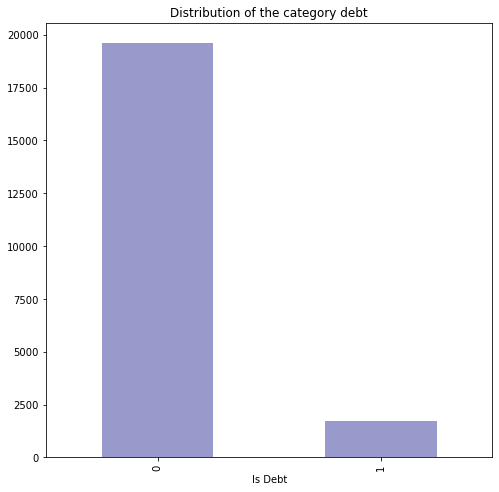

In [29]:
# Set chart sizes
plt.rcParams['figure.figsize'] = (8, 8)

# Distribution of the category debt
data_short['debt'].value_counts().plot.bar(color='#9999cc', 
                                           title='Distribution of the category debt',
                                           xlabel='Is Debt');

Let's also look at the distribution using `groupby`.

In [30]:
data_short.groupby('debt')['debt'].count()

debt
0    19599
1     1732
Name: debt, dtype: int64

Among the clients there are more of those who do not have a debt.

In the same way, let's look at the distribution of the `children` category: on the graph and in numbers.

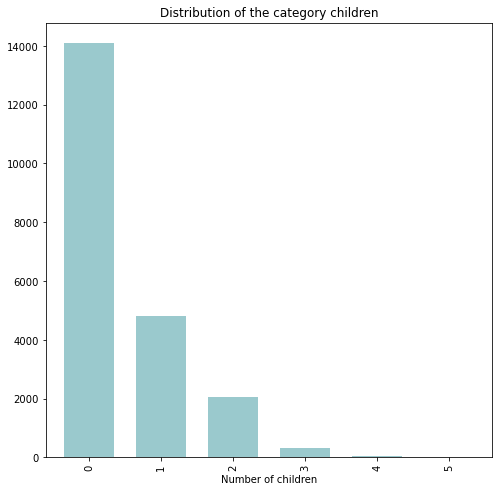

In [31]:
# Distribution of the category children
data_short['children'].value_counts().plot.bar(color='#9ac9cd', 
                                               title='Distribution of the category children',
                                               xlabel='Number of children',
                                               width=0.7);

In [32]:
data_short.groupby('children')['children'].count()

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

The `children` category is unevenly distributed (right-skewed). Among the clients there are more of those who do not have children.

*****

To check whether the number of children and the presence of loan debt are dependent, let's group the clients by the number of children, and for each of the groups obtained, calculate what proportion of clients have a loan debt.

To do this, create and display the pivot table `children_pivot`:

In [33]:
# Change the data type in the debt column to integer to group data
data_short['debt'] = data_short['debt'].astype('int')

C:\Users\marus\AppData\Local\Temp\ipykernel_20880\4235415695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_short['debt'] = data_short['debt'].astype('int')


In [34]:
children_pivot = data_short.pivot_table(index='children',
                                        values='debt',
                                        aggfunc=['count', 'sum', 'mean'],
                                        fill_value=0)
children_pivot

,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


**Findings:**

There is a relationship between the number of children and the repayment of the loan on time: the absence of children is somewhat weaker associated with loan debt, that is, customers who do not have children are less likely to have loan debt:

* clients who do not have children do not repay the debt with a "probability" of 7.5%
* clients with 1-4 children do not return the debt with a "probability" of 8.1 - 9.8%

However, for clients with five children, the value was not calculated correctly, since the sample of such clients is too small (only 9 people).

A likely explanation for the result, other than adjusting for unequal distribution, may be in the interest of clients to support their children rather than pay the loan on time.

*Recommendation for business:* other things being equal, check the solvency of customers with children in more detail, since the likelihood that they are in debt is higher.

<a id="marriage_and_debt"></a> 

### 3.2 Relationship between marital status and loan repayment on time

Let's look at the distribution of the `family_status_id` category visually and on specific numbers.

Categories are:
* `0` - married
* `1` - civil marriage
* `2` - widow
* `3` - divorced
* `4` - Not married

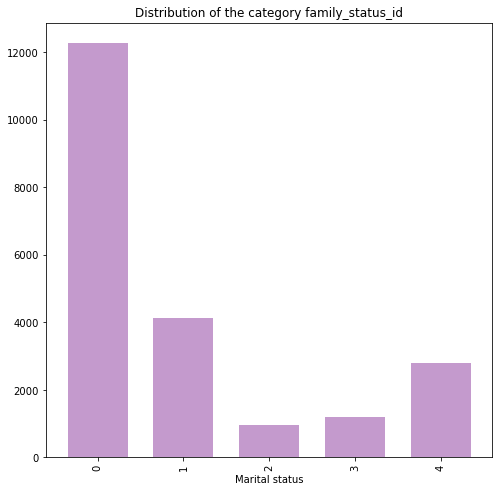

In [35]:
# Distribution of the category family_status_id
data_short['family_status_id'].value_counts().sort_index().plot.bar(color='#c49acd', 
                                                                    title='Distribution of the category family_status_id',
                                                                    xlabel='Marital status',
                                                                    width=0.7);

In [36]:
data_short.groupby('family_status_id')['family_status_id'].count()

family_status_id
0    12261
1     4134
2      951
3     1189
4     2796
Name: family_status_id, dtype: int64

In absolute numbers the distribution of clients by groups is uneven, there is a strong imbalance of classes:

* most clients are married (official or civil);
* the least number of widows.

*****

To check whether marital status and the presence of loan debt are dependent, let's group customers by marital status. For each of the groups obtained, let's calculate what proportion in each group is made up of customers with loan debt.

To do this, let's create and display the pivot table `family_pivot`:

In [37]:
family_pivot = data_short.pivot_table(index='family_status_id',
                                      values='debt',
                                      aggfunc=['count', 'sum', 'mean'],
                                      fill_value=0)
family_pivot

,count,sum,mean
,debt,debt,debt
family_status_id,,,
0,12261,927,0.075606
1,4134,385,0.093130
2,951,63,0.066246
3,1189,84,0.070648
4,2796,273,0.097639


**Findings:**

Marital status and repayment of the loan on time are really interconnected.

* widowers/widows are the least likely to default on a loan (6.6%), then divorced (7%). Such a conclusion is possible not only because they are more responsible credit payers, but also because of the lack of data - this group of clients is the least represented in the sample;

* the most frequently indebted clients are unmarried (9.8%);

* in second place in terms of the frequency of non-repayment of debt - clients who are in a civil marriage (9.3%).

*Recommendation for business:* all other things being equal, check the solvency of unmarried clients most carefully, since they have previously failed to repay their debt more often than others.

<a id="income_and_debt"></a> 

### 3.3 Relationship between income level and loan repayment on time

Let's look at the distribution of the `total_income_category` category visually.

Categories are:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

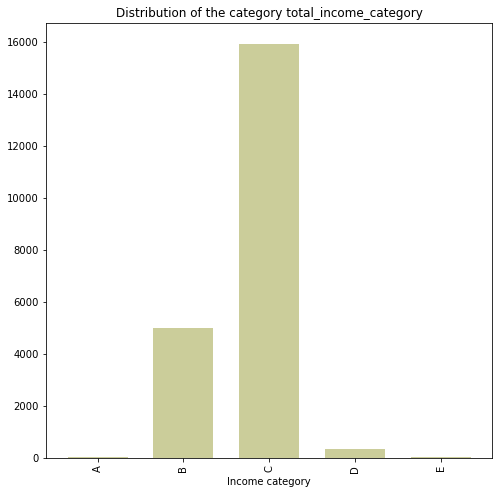

In [38]:
# Distribution of the category total_income_category
(
    data_short['total_income_category']
    .value_counts()
    .sort_index()
    .plot.bar(color='#cbcd9a', 
              title='Distribution of the category total_income_category',
              xlabel='Income category',
              width=0.7)
);

In [39]:
data_short.groupby('total_income_category')['total_income_category'].count()

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64

Since earlier the data was grouped into the `total_income` category, the distribution of the `total_income_category` variable is close to normal: the average income level is received by the majority of clients.

*****

To determine whether marital status and the presence of debt on a loan are dependent, let's group clients by marital status and for each of the groups obtained, let's calculate what proportion in each group is made up of clients with debt on a loan.

To do this, let's create and display the `income_pivot` pivot table:

In [40]:
income_pivot = data_short.pivot_table(index='total_income_category',
                                      values='debt',
                                      aggfunc=['count', 'sum', 'mean'],
                                      fill_value=0)
income_pivot

,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


**Findings:**

There is an indirect relationship between the level of income and the repayment of the loan on time:

* Clients with an income level of 30,001 - 50,000 rubles / month pay the loan most consistently - only 6% of them have debts;

* Most often, clients with an income level below 30,000 rubles / month have a debt - more than 9%. A logical conclusion, since sometimes with a low income it is not possible to repay the loan on time;

* Approximately at the same level (7 - 8.5%), customers with an income above 50,001 rubles / month have debts.

*Recommendation for business:* Other things being equal, it is better to check the credit history of clients with a salary below 30,000, as they often do not repay the loan on time.

<a id="purpose_and_debt"></a> 

### 3.4 Relationship between purposes of a loan and loan repayment on time

Let's build graphs for the distribution of customers based on the purpose of taking a loan, and also calculate how many customers are in each of the groups.

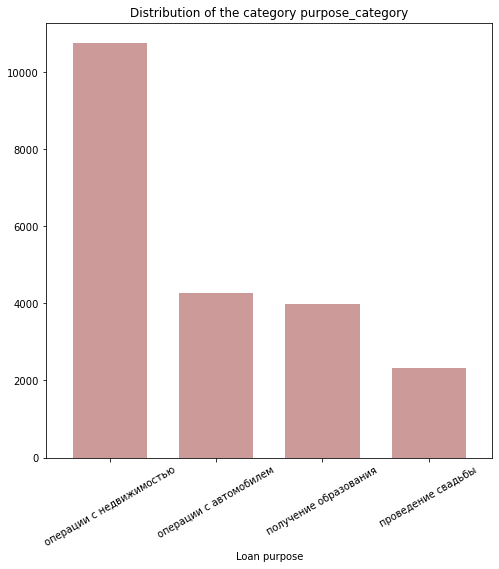

In [41]:
# Distribution of the category purpose_category
data_short['purpose_category'].value_counts().plot.bar(color='#cd9a9a', 
                                                       title='Distribution of the category purpose_category',
                                                       xlabel='Loan purpose',
                                                       width=0.7,
                                                       rot=30);

In [42]:
data_short.groupby('purpose_category')['purpose_category'].count()

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

Most often, bank customers take a loan for real estate. Least of all - for a wedding.

*****

To determine whether there is a relationship between the purpose of taking a loan and the presence of debt on it, let's group clients according to the purpose of taking a loan and for each of the groups obtained, let's calculate what proportion in each group is made up of clients with debt.

To do this, let's create and display a pivot table `purpose_pivot`:

In [43]:
purpose_pivot = data_short.pivot_table(index='purpose_category',
                                       values='debt',
                                       aggfunc=['count', 'sum', 'mean'],
                                       fill_value=0)
purpose_pivot

,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Findings:**

Indeed, different purposes of the loan affect its repayment on time in slightly different ways:

* According to the leader among the purposes of the loan - `'операции с недвижимостью'` (real estate transactions) the loan is returned most often.

* Most often, funds are not returned on time for a loan for a car (9.3%) and for education (9.2%).

This conclusion is non-intuitive (since real estate is clearly more expensive than a car, and it would be logical to see a higher frequency of debts on it).

A possible explanation is that real estate is the most "sensitive" area for people (many people buy their only home that they would not like to lose and stay on the street), so the loan default rate for real estate is somewhat lower.
And education and a car are not a necessity for most (perhaps this is a "luxury"), which is why they are more likely to delinquency.

*Recommendations for business:* Other things being equal, the most carefully check the solvency and credit history of customers for the purpose of credit - `'операции с автомобилем'` (car transactions) and `'получение образования'` (education).

<a id="conclusion"></a> 
  
## 4. General conclusion

In the project the relationship between a number of factors and the repayment of a bank loan on time were investigated.

*Input data:* statistics of solvency of bank customers.

*Application of the results*: building a software check of the solvency of customers in order to determine the probability of non-payment of a future loan on time (credit scoring model).


**Research hypotheses:**

- Hypothesis 1. There is a relationship between the number of children and loan repayment on time.

- Hypothesis 2. There is a relationship between marital status and loan repayment on time.

- Hypothesis 3. There is a relationship between the level of income and repayment of the loan on time.

- Hypothesis 4. There is a relationship between the objectives of the loan and its repayment on time.


As a result of testing the hypotheses, the following results were obtained:



**Hypothesis 1 was partially confirmed.**

- The proportion of debtors without children is less: 7.5%
- Share of debtors with 1 child more: 9.2%
- The proportion of debtors with 2 children is greater: 9.5%

Recommendation: When scoring, pay attention to the parameter of the presence of children in a client, since childless borrowers show themselves to be more responsible than clients with children.

**BUT**: We need more data on clients with 3 or more children to draw a reliable conclusion about their ability to pay (there are too few such clients in our data, so it is impossible to draw a reliable conclusion).



**Hypothesis 2 was fully confirmed.**

- The proportion of debtors who have never been in an officially registered marriage is higher:
    - 9.3% civil marriage
    - 9.8% Single
   
- The proportion of debtors who have ever been officially married is less than:
    - 6.6% widow/widower
    - 7.6% married
    - 7% divorced

Recommendation: When scoring, pay attention to the parameter whether the client has ever been officially married, since unmarried clients are less likely to repay the loan on time.



**Hypothesis 3 was partially confirmed.**

- Share of debtors with income up to 30,000: 9%
- Share of debtors with income of 30,001 - 50,000: 6%
- Share of debtors with income above 50,001: 7-8.5%

Recommendation: When scoring, pay attention to the income of clients, as borrowers with an income of up to 30,000 more often do not repay the loan on time.

**BUT**: We need more data on high earning clients (200,000 and above) to draw a firm conclusion about their likelihood of indebtedness (there are too few such clients in our data, so a firm conclusion cannot be drawn).



**Hypothesis 4 was fully confirmed.**

- The proportion of debtors on a loan for real estate: 7.3%
- Share of wedding loan debtors: 7.9%
- Share of car loan debtors: 9.3%
- Share of student loan debtors: 9.3%

Recommendation: Pay attention when scoring the purpose of the loan, since loans for cars and education are the least likely to be repaid, and for real estate, borrowers show themselves most responsibly.